In [1]:
# import talib
import numpy as np
# import pandas as pd
from backtesting_mom.signals1 import params_long, compute_signals_long
from backtesting.utils_compact import compact_all_medians, compact_best_medians
import warnings
warnings.simplefilter('ignore')

/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(


In [2]:
interval = '1h'
direction = 'long'
symbols = [
    "BTCUSDT",
    "ETHUSDT",
    "XRPUSDT",
    "SOLUSDT",
    "BNBUSDT",
    "DOGEUSDT",
    "ADAUSDT",
    "LINKUSDT",
    "AVAXUSDT",
    "SUIUSDT",
    "SHIBUSDT",
    "LTCUSDT",
    "HBARUSDT",
    "RENDERUSDT",
    "UNIUSDT",
]

In [3]:
params = params_long()
print(params.keys())

Number of permutations params_long: 324
dict_keys(['adx_p', 'adx_low', 'adx_high'])


In [4]:
medians_df, ohlc_dict, count_bars = compact_all_medians(
    symbols,
    interval,
    params,
    compute_signals_long,
)

Available pools -1: 15


/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby

Start computing signals for BNBUSDT
Start computing signals for SOLUSDT
Start computing signals for ETHUSDT
Start computing signals for BTCUSDT
Start computing signals for XRPUSDT
Start computing signals for ADAUSDT
Start computing signals for LTCUSDT
Start computing signals for AVAXUSDT
Start computing signals for DOGEUSDT
Start computing signals for LINKUSDT
Start computing signals for SHIBUSDT
Start computing signals for HBARUSDT
Start computing signals for SUIUSDT
Start computing signals for RENDERUSDT
Start computing signals for UNIUSDT
End computing signals for RENDERUSDT
End computing signals for BTCUSDT
End computing signals for ETHUSDT
End computing signals for SOLUSDT
End computing signals for BNBUSDT
End computing signals for AVAXUSDT
End computing signals for LTCUSDT
End computing signals for DOGEUSDT
End computing signals for LINKUSDT
End computing signals for XRPUSDT
End computing signals for HBARUSDT
End computing signals for SHIBUSDT
End computing signals for UNIUSDT
En

/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby

Start computing portfolio metrics for BNBUSDT
Start computing portfolio metrics for BTCUSDT
Start computing portfolio metrics for XRPUSDT
Start computing portfolio metrics for ETHUSDT
Start computing portfolio metrics for DOGEUSDT
Start computing portfolio metrics for SOLUSDT
Start computing portfolio metrics for LINKUSDT
Start computing portfolio metrics for ADAUSDT
Start computing portfolio metrics for SUIUSDT
Start computing portfolio metrics for AVAXUSDT
Start computing portfolio metrics for SHIBUSDT
Start computing portfolio metrics for RENDERUSDT
Start computing portfolio metrics for LTCUSDT
Start computing portfolio metrics for HBARUSDT
Start computing portfolio metrics for UNIUSDT
End computing portfolio metrics for RENDERUSDT
End computing portfolio metrics for ETHUSDT
End computing portfolio metrics for BTCUSDT
End computing portfolio metrics for LINKUSDT
End computing portfolio metrics for SHIBUSDT
End computing portfolio metrics for BNBUSDT
End computing portfolio metrics f

In [5]:
print(count_bars)

8784


In [6]:
joined_long_df = medians_df.copy()
joined_long_df = joined_long_df.replace([np.inf, -np.inf], np.nan)
joined_long_df = joined_long_df.dropna()
# remove with negative total return
# joined_long_df = joined_long_df[joined_long_df['total_return'] > 0]
# joined_long_df = joined_long_df[joined_long_df > joined_long_df.quantile(0.45)]
joined_long_df = joined_long_df.dropna()
print(joined_long_df.describe())
# joined_long_df.sort_values(by='win_rate', ascending=False)
# joined_long_df.reset_index().to_csv(f'results_{direction}_{interval}_{count_bars}.csv', index=False)
joined_long_df = joined_long_df.sort_values(by='expectancy', ascending=False).head(55)
joined_long_df.head(8)

       total_return    win_rate       count  profit_factor  max_drawdown  \
count    315.000000  315.000000  315.000000     315.000000    315.000000   
mean      -0.110782    0.544188   44.723810       0.494136     -0.124468   
std        0.022480    0.020640    8.675497       0.042982      0.021883   
min       -0.161458    0.500000   23.000000       0.413983     -0.173458   
25%       -0.130589    0.530931   38.000000       0.466278     -0.141671   
50%       -0.111249    0.543478   46.000000       0.492553     -0.125097   
75%       -0.095741    0.558140   52.000000       0.519953     -0.110721   
max       -0.062927    0.603774   59.000000       0.637211     -0.074871   

       expectancy  
count  315.000000  
mean    -2.620547  
std      0.316085  
min     -3.344500  
25%     -2.865315  
50%     -2.624632  
75%     -2.418321  
max     -1.689986  


total_return  win_rate  count  \
long_adx_p long_adx_low long_adx_high                                  
19         16           32                -0.071990  0.603774   49.0   
                        34                -0.071990  0.603774   49.0   
                        28                -0.071990  0.603774   49.0   
                        30                -0.071990  0.603774   49.0   
                        36                -0.071990  0.603774   49.0   
                        26                -0.071990  0.603774   49.0   
15         16           28                -0.095988  0.583333   52.0   
                        30                -0.095988  0.583333   52.0   

                                       profit_factor  max_drawdown  expectancy  
long_adx_p long_adx_low long_adx_high                                           
19         16           32                  0.637211     -0.111123   -1.689986  
                        34                  0.637211     -0.111123   -1.689986  
                        28                  0.637211     -0.111123   -1.689986  
                        30                  0.637211     -0.111123   -1.689986  
                        36                  0.637211     -0.111123   -1.689986  
                        26                  0.637211     -0.111123   -1.689986  
15         16           28                  0.571898     -0.128085   -1.989415  
                        30                  0.571898     -0.128085   -1.989415

In [7]:
dfc = joined_long_df.copy()
joined_best_orig_df, pf_dict = compact_best_medians(
    dfc,
    symbols,
    ohlc_dict,
    compute_signals_long,
)

Available pools -1: 15


/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby

Start computing signals for UNIUSDT
Start computing signals for ADAUSDT
Start computing signals for SUIUSDT
Start computing signals for RENDERUSDT
Start computing signals for LTCUSDT
Start computing signals for DOGEUSDT
Start computing signals for BNBUSDT
Start computing signals for HBARUSDT
Start computing signals for SOLUSDT
Start computing signals for SHIBUSDT
Start computing signals for AVAXUSDT
Start computing signals for LINKUSDT
Start computing signals for XRPUSDT
Start computing signals for BTCUSDT
Start computing signals for ETHUSDT
End computing signals for RENDERUSDT
End computing signals for ETHUSDT
End computing signals for LTCUSDT
End computing signals for BTCUSDT
End computing signals for LINKUSDT
End computing signals for HBARUSDT
End computing signals for SHIBUSDT
End computing signals for SUIUSDT
End computing signals for UNIUSDT
End computing signals for AVAXUSDT
End computing signals for ADAUSDT
End computing signals for BNBUSDT
End computing signals for XRPUSDT
End

In [8]:
joined_best_df = joined_best_orig_df.copy()
# joined_df.sort_values(by='expectancy', ascending=False)
joined_best_df
joined_best_df = joined_best_df.replace([np.inf, -np.inf], np.nan)
joined_best_df = joined_best_df.dropna()
# joined_df = joined_df[joined_df > joined_df.quantile(0.35)]
joined_best_df = joined_best_df.dropna()
# # print(joined_df.describe())

# # drop multiindex and save to csv
# # joined_df.reset_index().to_csv(f'results_{direction}_{interval}_{count_bars}.csv', index=False)
joined_best_df = joined_best_df.sort_values(by='expectancy', ascending=False).head(5)
joined_best_df.head(4)

total_return  win_rate  count  \
long_adx_p long_adx_low long_adx_high                                  
19         16           34                 -0.07199  0.603774   49.0   
                        36                 -0.07199  0.603774   49.0   
                        26                 -0.07199  0.603774   49.0   
                        28                 -0.07199  0.603774   49.0   

                                       profit_factor  max_drawdown  expectancy  
long_adx_p long_adx_low long_adx_high                                           
19         16           34                  0.637211     -0.111123   -1.689986  
                        36                  0.637211     -0.111123   -1.689986  
                        26                  0.637211     -0.111123   -1.689986  
                        28                  0.637211     -0.111123   -1.689986

#########################
BTCUSDT


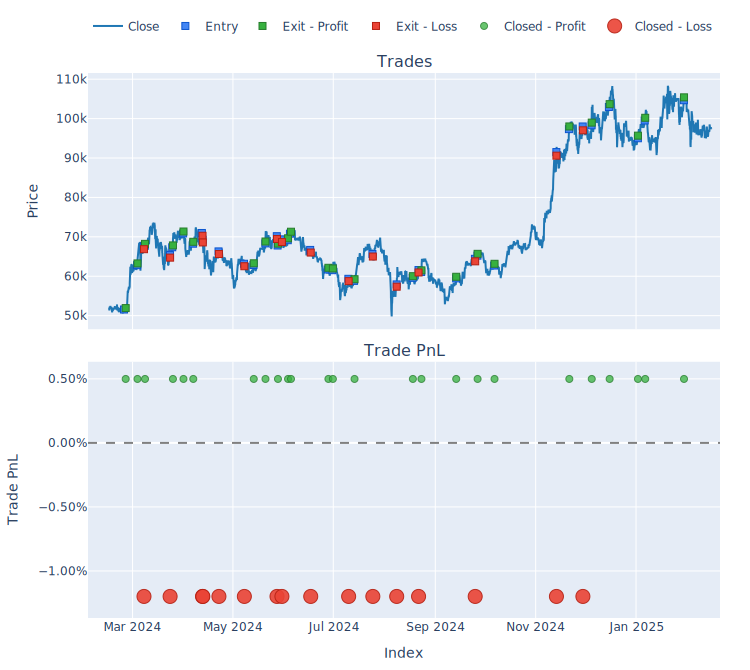

#########################
#########################
ETHUSDT


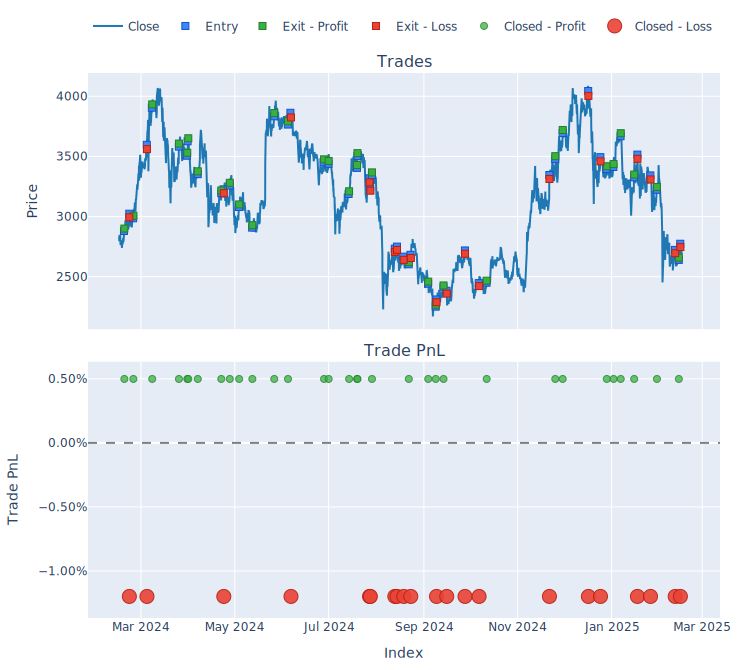

#########################
#########################
XRPUSDT


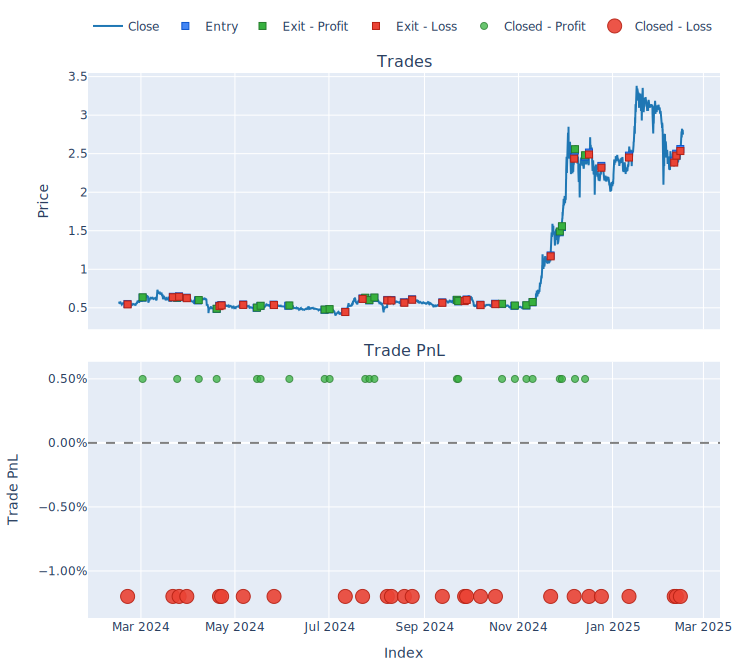

#########################
#########################
SOLUSDT


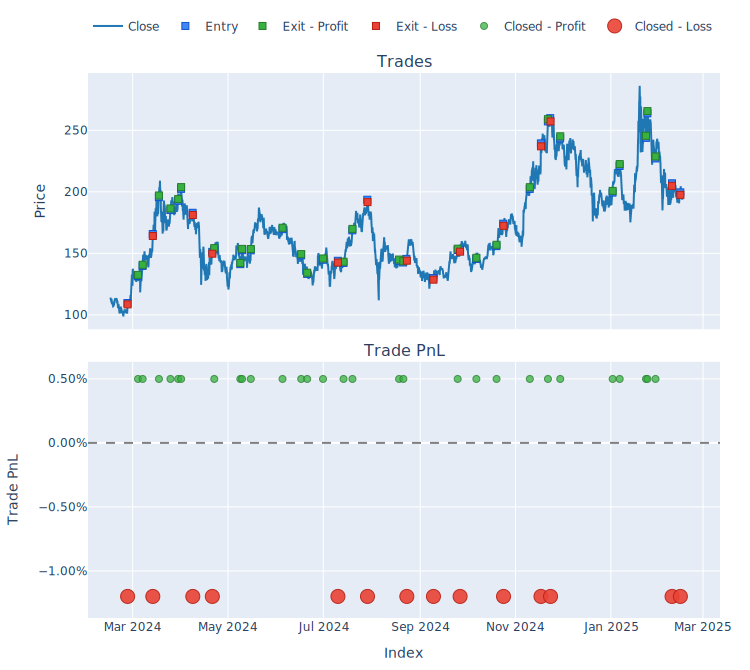

#########################
#########################
BNBUSDT


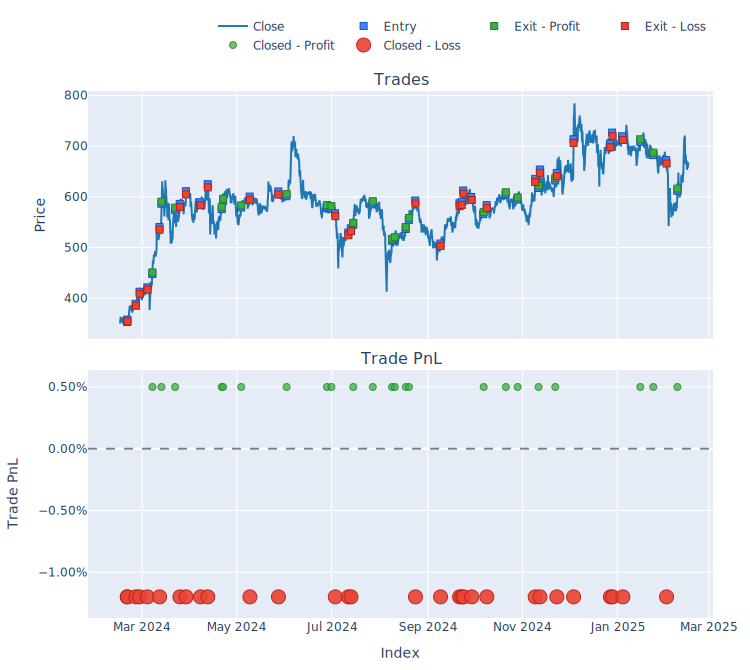

#########################
#########################
DOGEUSDT


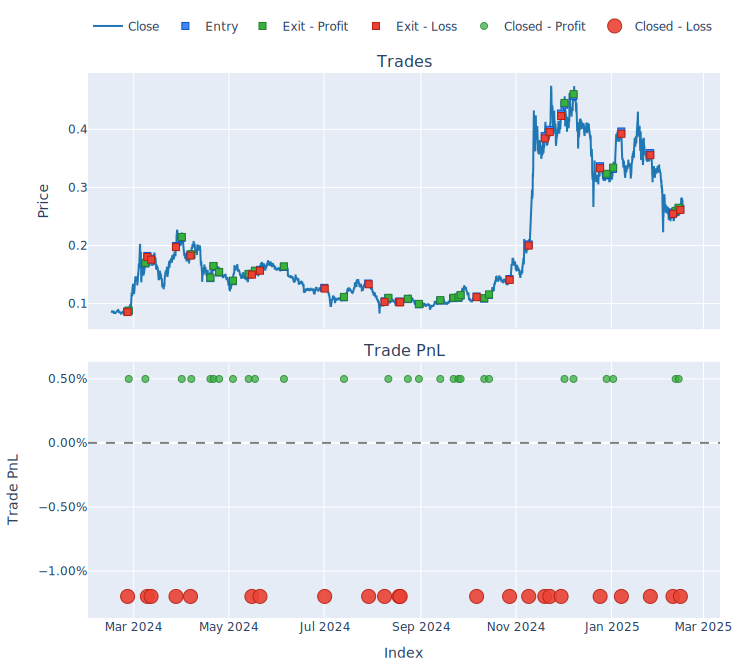

#########################
#########################
ADAUSDT


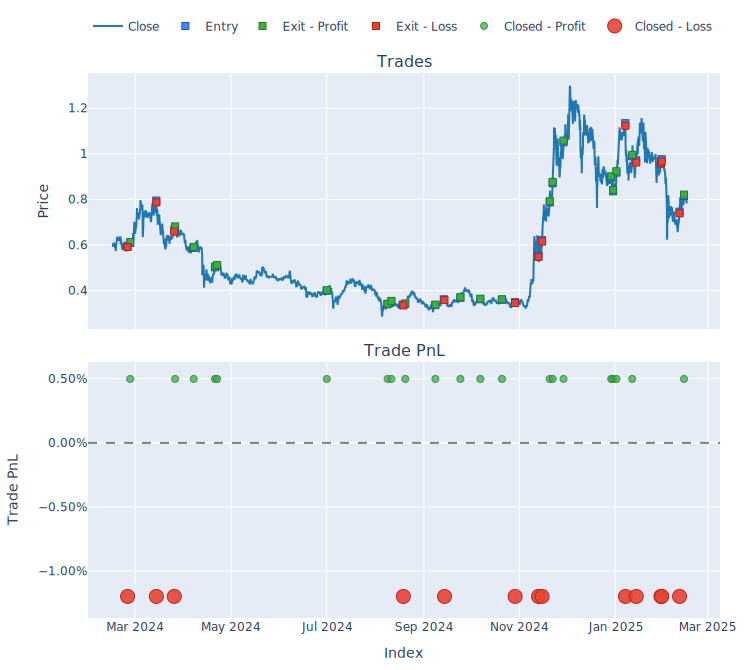

#########################
#########################
LINKUSDT


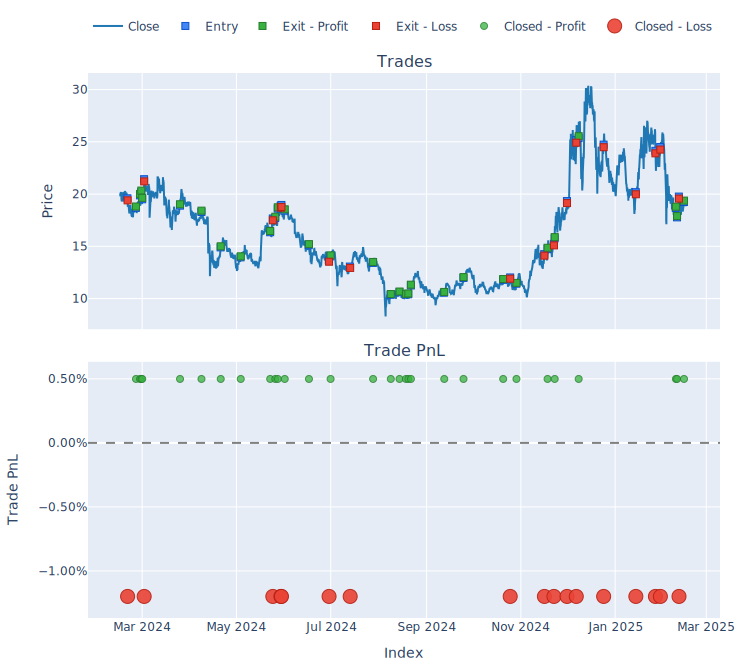

#########################
#########################
AVAXUSDT


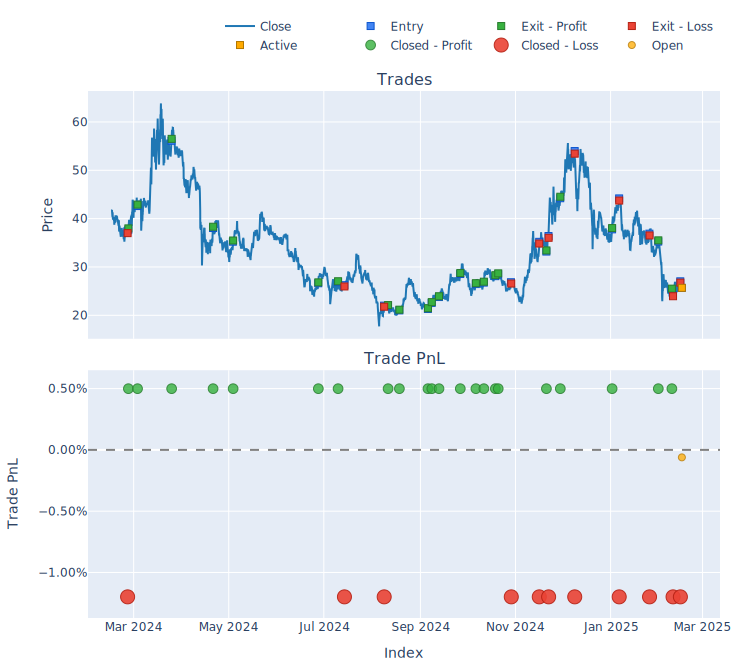

#########################
#########################
SUIUSDT


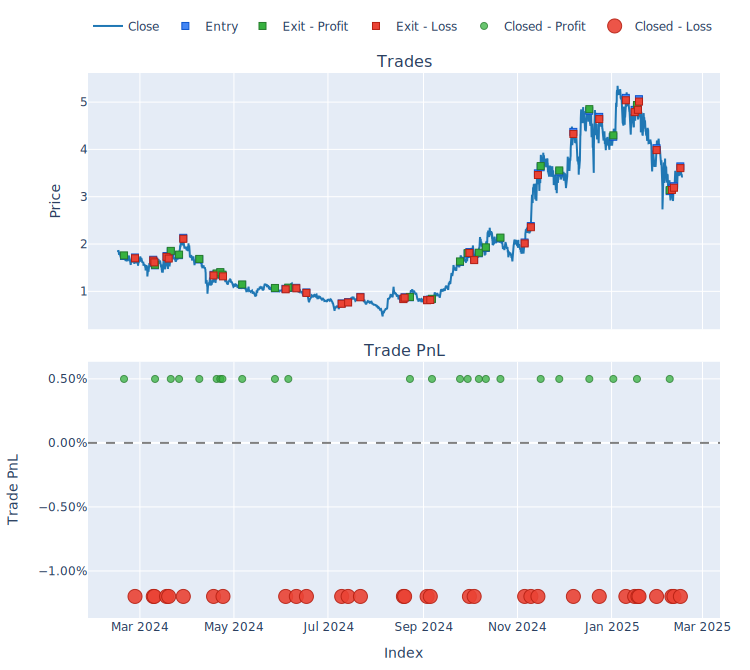

#########################
#########################
SHIBUSDT


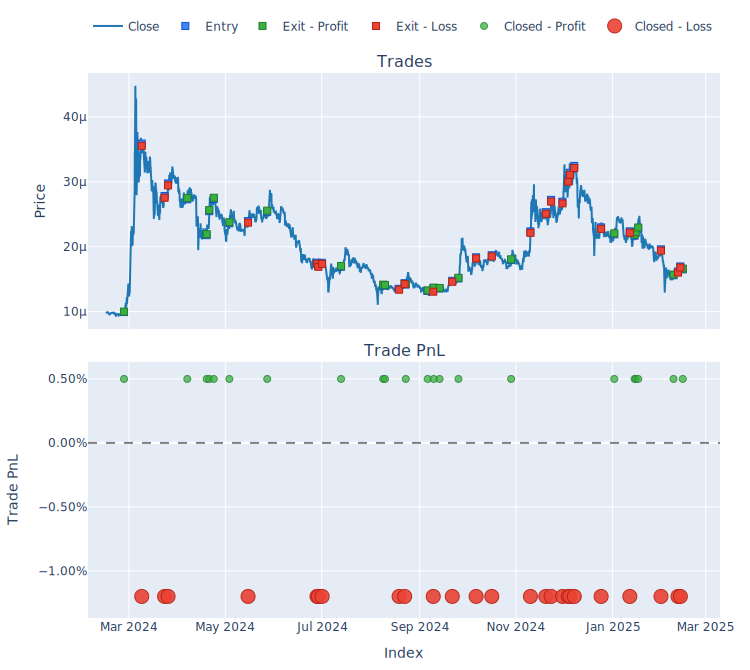

#########################
#########################
LTCUSDT


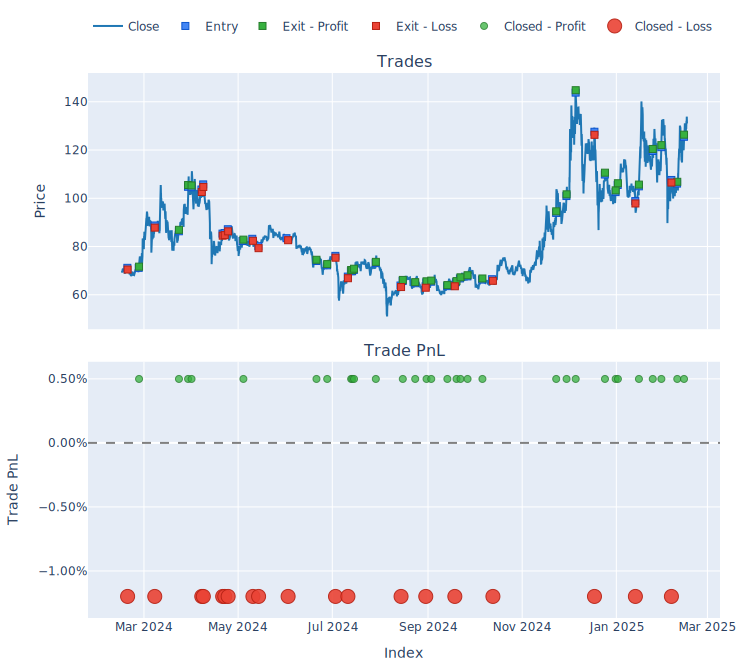

#########################
#########################
HBARUSDT


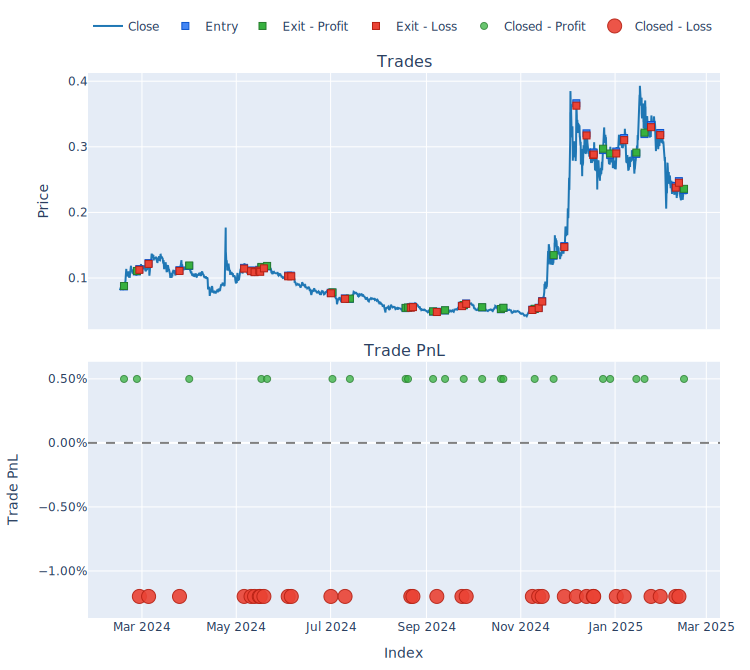

#########################
#########################
RENDERUSDT


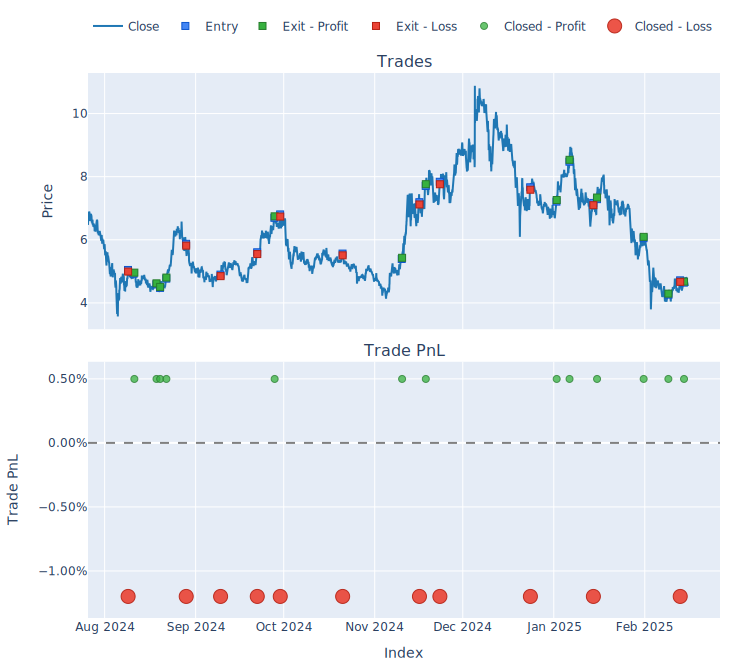

#########################
#########################
UNIUSDT


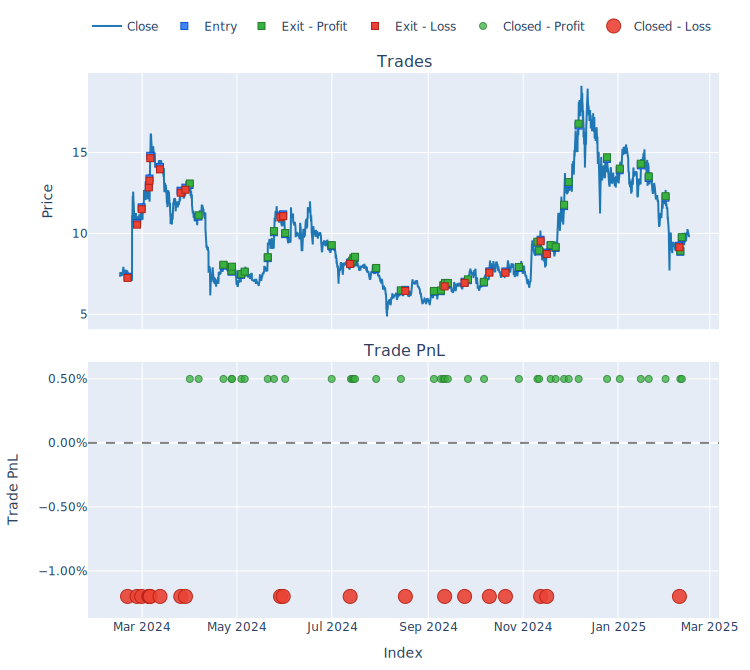

#########################


In [9]:
idxs = [0]
for idx in idxs:
   for symbol in symbols:
      pf = pf_dict[symbol].copy()
      print("#########################")
      # print(symbol)
      # pf[joined_best_df.index[idx]].plot_cum_returns().show_svg()
      print(symbol)
      pf.trades[joined_best_df.index[idx]].plots(settings=dict(plot_zones=False)).show_svg()
      print("#########################")